I. 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
comp_data = pd.read_csv('Company_Data.csv')
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
comp_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
comp_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


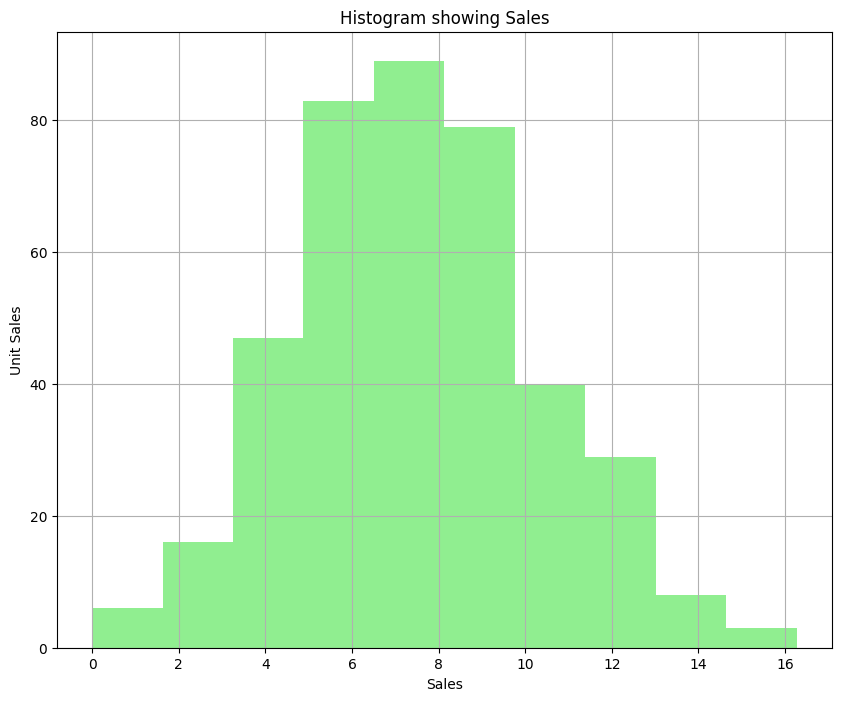

In [8]:
plt.figure(figsize=(10,8))
plt.hist(comp_data['Sales'], bins=10,color='lightgreen')
plt.title('Histogram showing Sales')
plt.xlabel('Sales')
plt.ylabel('Unit Sales')
plt.grid(True)
plt.show()

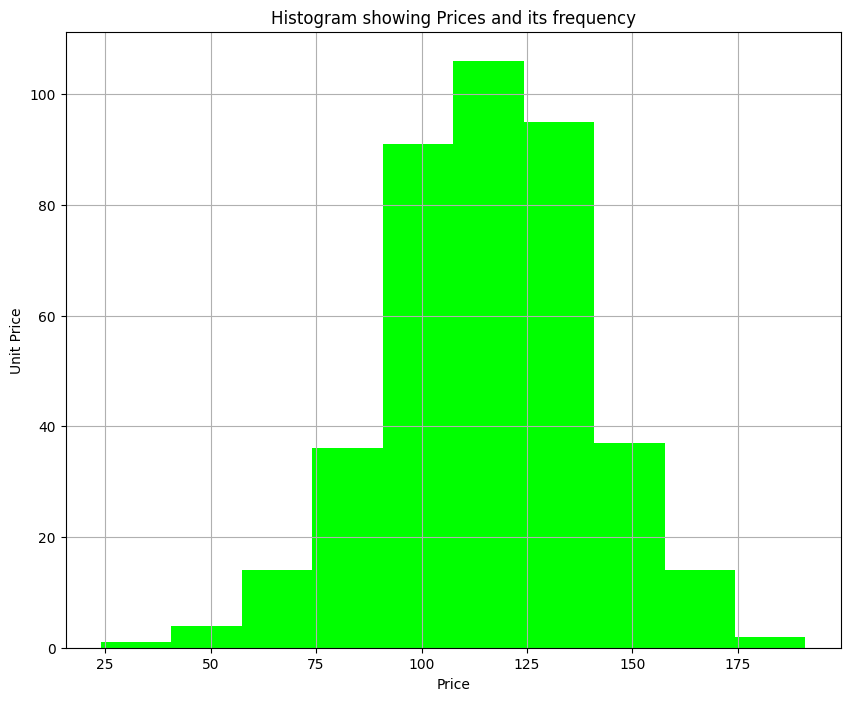

In [9]:
plt.figure(figsize=(10,8))
plt.hist(comp_data['Price'], bins=10,color='lime')
plt.title('Histogram showing Prices and its frequency')
plt.xlabel('Price')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

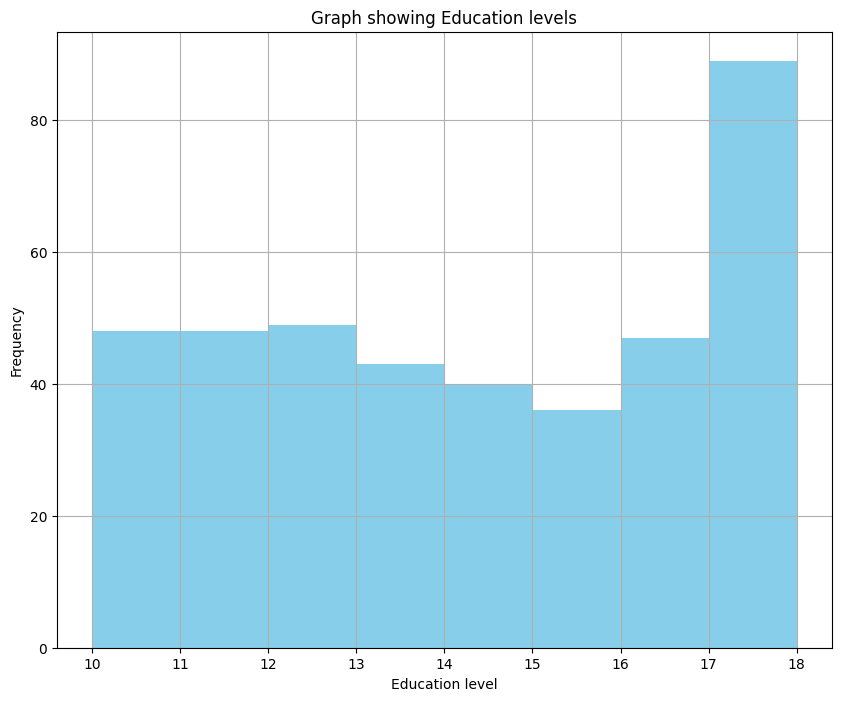

In [10]:
plt.figure(figsize=(10,8))
plt.hist(comp_data['Education'], bins=8,color='skyblue')
plt.title('Graph showing Education levels')
plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
comp_data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,1,Yes
396,6.14,139,23,3,37,120,Medium,55,11,0,Yes
397,7.41,162,26,12,368,159,Medium,40,18,1,Yes
398,5.94,100,79,7,284,95,Bad,50,12,1,Yes
399,9.71,134,37,0,27,120,Good,49,16,1,Yes


Conversion of Sales, ShelveLoc, Urban and US columns into category columns

In [11]:
comp_data['Urban']=comp_data['Urban'].astype('category')
comp_data['Urban']=comp_data['Urban'].map({'Yes': 1,'No': 0})

In [13]:
comp_data['US']=comp_data['US'].astype('category')
comp_data['US']=comp_data['US'].map({'Yes': 1,'No': 0})

In [14]:
comp_data['ShelveLoc']=comp_data['ShelveLoc'].astype('category')
comp_data['ShelveLoc']=comp_data['ShelveLoc'].map({'Good': 1, 'Medium': 0, 'Bad': -1})

In [15]:
bins=[-np.inf, 5, 10, np.inf]
labels=[1, 2, 3]
comp_data['Sales']=pd.cut(comp_data['Sales'], bins=bins,labels=labels)

In [16]:
comp_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,-1,42,17,1,1
1,3,111,48,16,260,83,1,65,10,1,1
2,3,113,35,10,269,80,0,59,12,1,1
3,2,117,100,4,466,97,0,55,14,1,1
4,1,141,64,3,340,128,-1,38,13,1,0
5,3,124,113,13,501,72,-1,78,16,0,1
6,2,115,105,0,45,108,0,71,15,1,0
7,3,136,81,15,425,120,1,67,10,1,1
8,2,132,110,0,108,124,0,76,10,0,0
9,1,132,113,0,131,124,0,76,17,0,1


In [17]:
comp_data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,3,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,0,55,11,0,1
397,2,162,26,12,368,159,0,40,18,1,1
398,2,100,79,7,284,95,-1,50,12,1,1
399,2,134,37,0,27,120,1,49,16,1,1


In [37]:
x=comp_data.values[:,1:]
y=comp_data.values[:,0]

In [38]:
x.shape

(400, 10)

In [39]:
x

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [40]:
y.shape

(400,)

In [41]:
y

array([2, 3, 3, 2, 1, 3, 2, 3, 2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 1, 2, 3, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 2, 3, 1,
       1, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 3,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2,
       2, 2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2,
       2, 3, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2, 1, 2, 3,
       3, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 1, 3, 2, 2,

In [43]:
comp_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [59]:
col_x =comp_data.columns[1:]

In [51]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

scaler.fit(x)
x=scaler.transform(x)

In [52]:
x2= pd.DataFrame(x, columns=col_x)

In [54]:
x

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.80236876,
         0.64686916,  0.74188112]])

In [55]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 10)
(320,)
(80, 10)
(80,)


To know about the segment or attributes causes high sale. 


In [57]:
from sklearn.ensemble import RandomForestClassifier 

model_rf= RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred=model_rf.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

cfm=confusion_matrix(y_test, y_pred)
print(cfm)
print("Classification Report:  ")

print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model:  ", acc)

[[ 4 13  0]
 [ 1 51  5]
 [ 0  4  2]]
Classification Report:  
              precision    recall  f1-score   support

           1       0.80      0.24      0.36        17
           2       0.75      0.89      0.82        57
           3       0.29      0.33      0.31         6

    accuracy                           0.71        80
   macro avg       0.61      0.49      0.50        80
weighted avg       0.73      0.71      0.68        80

Accuracy of the model:   0.7125


In [71]:
attribute_contribution = pd.DataFrame({
    "Attributes": col_x,
    "Contribution of the attributes": model_rf.feature_importances_
})
top_contributing_attribute = attribute_contribution.sort_values(by="Contribution of the attributes", ascending=False).head(10)


In [72]:
print(top_contributing_attribute)

    Attributes  Contribution of the attributes
4        Price                        0.209966
5    ShelveLoc                        0.150194
6          Age                        0.124330
3   Population                        0.116992
0    CompPrice                        0.115387
1       Income                        0.101515
2  Advertising                        0.083738
7    Education                        0.069371
9           US                        0.015182
8        Urban                        0.013324


---------------------------------------------------------------------------

### Changes/Additions as per reccomendations

Explore on bagging and boosting to compare the result . Explore on EDA and  visualization . Add some more visualization for a better understanding of the data set. Explore on  entropy,gini criterion.Try to add LGBM AND XGBM ensemble technique to improve the model.

In [38]:
comp_data = pd.read_csv('Company_Data.csv')
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [39]:
comp_data['Urban']=comp_data['Urban'].astype('category')
comp_data['Urban']=comp_data['Urban'].map({'Yes': 1,'No': 0})

In [40]:
comp_data['US']=comp_data['US'].astype('category')
comp_data['US']=comp_data['US'].map({'Yes': 1,'No': 0})

In [41]:
comp_data['ShelveLoc']=comp_data['ShelveLoc'].astype('category')
comp_data['ShelveLoc']=comp_data['ShelveLoc'].map({'Good': 1, 'Medium': 0, 'Bad': -1})

In [42]:
bins=[-np.inf, 5, 10, np.inf]
labels=[1, 2, 3]
comp_data['Sales']=pd.cut(comp_data['Sales'], bins=bins,labels=labels)

In [43]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,-1,42,17,1,1
1,3,111,48,16,260,83,1,65,10,1,1
2,3,113,35,10,269,80,0,59,12,1,1
3,2,117,100,4,466,97,0,55,14,1,1
4,1,141,64,3,340,128,-1,38,13,1,0


EDA for company data

In [11]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(4), int64(7)
memory usage: 24.1 KB


In [12]:
comp_data.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [14]:
comp_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

visualizations related to comp_data

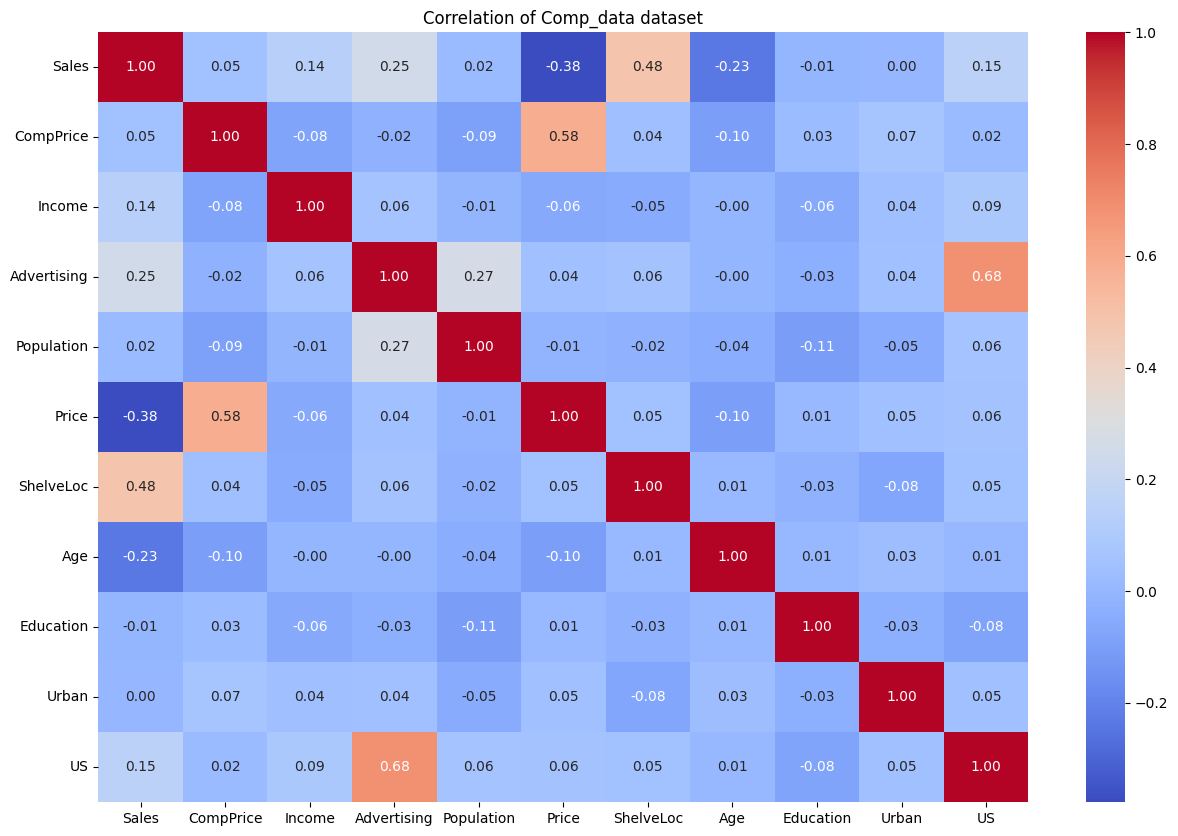

In [16]:
# Correlation
corr_comp_data = comp_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_comp_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Comp_data dataset')
plt.show()

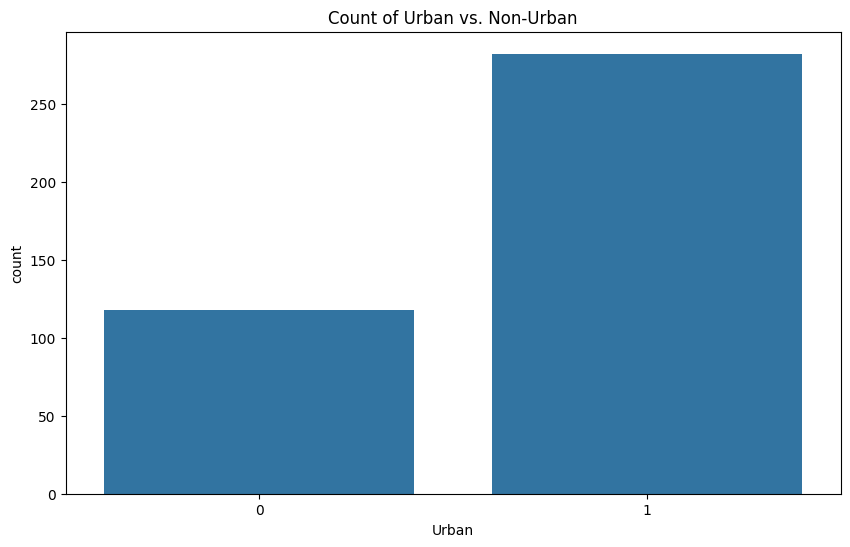

In [17]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Urban', data=comp_data)
plt.title('Count of Urban vs. Non-Urban')
plt.show()

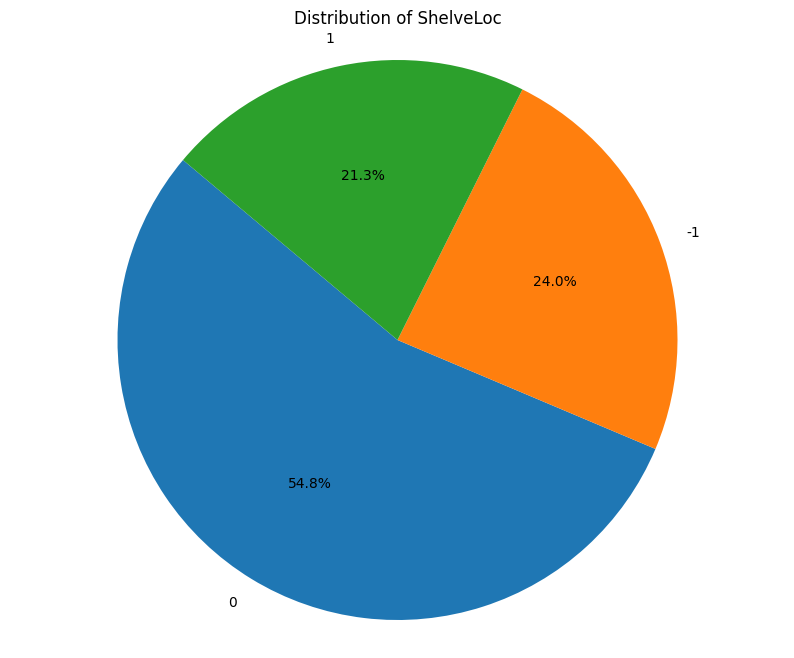

In [18]:
# Shelveloc piechart
shelveloc_counts = comp_data['ShelveLoc'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(shelveloc_counts, labels=shelveloc_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of ShelveLoc')
plt.axis('equal') 
plt.show()

For the above pie chart, -1 represents bad, 0 is medium and 1 as good.

In [44]:
x=comp_data.values[:,1:]
y=comp_data.values[:,0]

In [45]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [22]:
! pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.3 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.7 MB/s eta 0:00:00


In [24]:
! pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 939.4 kB/s eta 0:01:47
   ---------------------------------------- 0.5/99.8 MB 2.7 MB/s eta 0:00:38
    --------------------------------------- 1.3/99.8 MB 5.8 MB/s eta 0:00:17
   - -------------------------------------- 2.6/99.8 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 3.6/99.8 MB 11.9 MB/s eta 0:00:09
   - -------------------------------------- 4.0/99.8 MB 11.5 MB/s eta 0:00:09
   -- ------------------------------------- 5.3/99.8 MB 13.5 MB/s eta 0:00:08
   -- ------------------------------------- 6.7/99.8 MB 15.3 MB/s eta 0:00:07
   --- ------------------------------------ 7.8/99.8 MB 16.0 MB/s eta 0:00:06
   --- ----

In [47]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.metrics import classification_report, accuracy_score 
import lightgbm as lb 
import xgboost as xgb

In [26]:
# RandomForest
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

print("Random Forest prediction accuracy: ", accuracy_score(y_test,y_pred_rf)) 
print(classification_report(y_test, y_pred_rf))

Random Forest prediction accuracy:  0.6375
              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.64      0.92      0.76        49
           3       0.67      0.22      0.33        18

    accuracy                           0.64        80
   macro avg       0.60      0.43      0.44        80
weighted avg       0.62      0.64      0.58        80



In [27]:
# Gradientboosting
gdb_model=GradientBoostingClassifier()
gdb_model.fit(x_train,y_train)
y_pred_gdb=gdb_model.predict(x_test)

print("GradientBoosting prediction accuracy: ", accuracy_score(y_test,y_pred_gdb)) 
print(classification_report(y_test, y_pred_gdb))

GradientBoosting prediction accuracy:  0.6375
              precision    recall  f1-score   support

           1       0.56      0.38      0.45        13
           2       0.66      0.86      0.74        49
           3       0.57      0.22      0.32        18

    accuracy                           0.64        80
   macro avg       0.59      0.49      0.51        80
weighted avg       0.62      0.64      0.60        80



In [49]:
comp_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,-1,42,17,1,1
1,3,111,48,16,260,83,1,65,10,1,1
2,3,113,35,10,269,80,0,59,12,1,1
3,2,117,100,4,466,97,0,55,14,1,1
4,1,141,64,3,340,128,-1,38,13,1,0
5,3,124,113,13,501,72,-1,78,16,0,1
6,2,115,105,0,45,108,0,71,15,1,0
7,3,136,81,15,425,120,1,67,10,1,1
8,2,132,110,0,108,124,0,76,10,0,0
9,1,132,113,0,131,124,0,76,17,0,1


In [52]:
comp_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [57]:
x=comp_data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
y=comp_data['Sales']

In [59]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,-1,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,0,59,12,1,1
3,117,100,4,466,97,0,55,14,1,1
4,141,64,3,340,128,-1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,0,55,11,0,1
397,162,26,12,368,159,0,40,18,1,1
398,100,79,7,284,95,-1,50,12,1,1


In [58]:
y

0      2
1      3
2      3
3      2
4      1
      ..
395    3
396    2
397    2
398    2
399    2
Name: Sales, Length: 400, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [32]:
! pip install xgboost

In [61]:
print(comp_data['Sales'].dtype)


category


In [62]:
# LightGBM
lb_model = lb.LGBMClassifier()
lb_model.fit(x_train, y_train)
lb_pred = lb_model.predict(x_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lb_pred))
print(classification_report(y_test, lb_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -0.490206
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

### XGB Classifier

In [96]:
comp_data_xgb=pd.read_csv('Company_Data.csv')

In [97]:
from sklearn.preprocessing import LabelEncoder 
comp_data_xgb['Sales_range']=pd.cut(comp_data_xgb['Sales'], bins=5,labels=False)

In [98]:
comp_data_xgb

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_range
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,3
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,3
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,3
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,2
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1


In [99]:
x=comp_data_xgb[['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
y=comp_data_xgb['Sales_range']

In [100]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [101]:
y

0      2
1      3
2      3
3      2
4      1
      ..
395    3
396    1
397    2
398    1
399    2
Name: Sales_range, Length: 400, dtype: int64

In [102]:
label_encoder = LabelEncoder()
y2 = label_encoder.fit_transform(y)

In [103]:
y2

array([2, 3, 3, 2, 1, 3, 2, 3, 2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 4, 2, 1, 3,
       1, 1, 3, 4, 2, 1, 0, 2, 4, 2, 1, 2, 0, 3, 2, 1, 2, 0, 0, 2, 3, 1,
       1, 1, 3, 1, 1, 3, 0, 1, 2, 2, 1, 2, 3, 0, 1, 1, 2, 2, 0, 2, 2, 1,
       2, 2, 4, 2, 2, 1, 1, 3, 1, 2, 3, 2, 1, 2, 2, 2, 3, 1, 0, 2, 2, 3,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 0, 2, 2, 1, 3, 2, 3, 3, 3, 2, 1,
       2, 2, 2, 3, 3, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 3, 2, 3, 2, 1, 0, 2,
       1, 3, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1, 2, 3, 2, 2, 2, 4, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 3, 2, 1, 0, 1, 1, 2, 3,
       3, 1, 2, 1, 1, 2, 2, 2, 1, 3, 1, 2, 4, 2, 2, 1, 2, 2, 2, 1, 3, 3,
       1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 3, 1, 3, 3, 2, 2, 2, 2, 2, 1, 0, 3, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 0, 3, 2, 2,

In [104]:
label_encoder = LabelEncoder()
x['ShelveLoc'] = label_encoder.fit_transform(x['ShelveLoc'])
x['Urban'] = label_encoder.fit_transform(x['Urban'])
x['US'] = label_encoder.fit_transform(x['US'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16220\4287251570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['ShelveLoc'] = label_encoder.fit_transform(x['ShelveLoc'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16220\4287251570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Urban'] = label_encoder.fit_transform(x['Urban'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16220\4287251570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [105]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.2,random_state=10)

In [106]:

# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.55      0.50      0.52        32
           2       0.37      0.59      0.45        29
           3       0.75      0.19      0.30        16
           4       0.00      0.00      0.00         2

    accuracy                           0.45        80
   macro avg       0.33      0.25      0.26        80
weighted avg       0.50      0.45      0.43        80



c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

------

---

### II. Use Random Forest to prepare a model on fraud data. 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [19]:
fr_data = pd.read_csv("Fraud_check.csv")
fr_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [20]:
fr_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [21]:
fr_data['Undergrad'] = fr_data['Undergrad'].astype('category')
fr_data['Undergrad'] = fr_data['Undergrad'].map({'YES': 1,'NO': 0})

In [22]:
fr_data['Marital.Status'] = fr_data['Marital.Status'].astype('category')
fr_data['Marital.Status'] = fr_data['Marital.Status'].map({'Single': 0,'Divorced': -1, 'Married': 1})

In [23]:
fr_data['Urban'] = fr_data['Urban'].astype('category')
fr_data['Urban'] = fr_data['Urban'].map({'NO': 0, 'YES': 1})

In [24]:
bins = [-np.inf, 30000, np.inf] 
labels = [-1, 1]
fr_data['Taxable.Income']=pd.cut(fr_data['Taxable.Income'], bins=bins,labels=labels)
fr_data['Taxable.Income']=fr_data['Taxable.Income'].astype('int')

In [25]:
fr_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,-1,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,-1,1,39492,7,1
596,1,-1,1,55369,2,1
597,0,-1,1,154058,0,1
598,1,1,1,180083,17,0


In [26]:
x=fr_data[['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']]
y=fr_data['Taxable.Income']

In [27]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,-1,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,-1,39492,7,1
596,1,-1,55369,2,1
597,0,-1,154058,0,1
598,1,1,180083,17,0


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int32

In [29]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [30]:
print(x)

[[-1.040833   -0.01043082 -1.17852072 -0.62914254  0.99335541]
 [ 0.96076892 -1.2621297   0.50850002  0.27636996  0.99335541]
 [-1.040833    1.24126805  1.03310911  1.63463872  0.99335541]
 ...
 [-1.040833   -1.2621297   0.90969648 -1.76103318  0.99335541]
 [ 0.96076892  1.24126805  1.43219749  0.1631809  -1.00668904]
 [-1.040833   -1.2621297   0.9915901   0.04999184 -1.00668904]]


In [31]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 5)
(120, 5)
(480,)
(120,)


In [33]:
from sklearn.ensemble import RandomForestClassifier 
model_rf= RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)

In [34]:
from sklearn.metrics  import confusion_matrix, accuracy_score, classification_report 

cfm=confusion_matrix(y_test, y_pred)
print(cfm)
print("Classification Report:  ")

print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model:  ", acc)

[[ 0 21]
 [ 4 95]]
Classification Report:  
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        21
           1       0.82      0.96      0.88        99

    accuracy                           0.79       120
   macro avg       0.41      0.48      0.44       120
weighted avg       0.68      0.79      0.73       120

Accuracy of the model:   0.7916666666666666


---

### Changes/Additions as per reccomendations

Explore on bagging and boosting to compare the result . Explore on EDA and  visualization . Add some more visualization for a better understanding of the data set. Explore on  entropy,gini criterion.Try to add LGBM AND XGBM ensemble technique to improve the model.

In [140]:
fr_data = pd.read_csv("Fraud_check.csv")
fr_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [141]:
fr_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [142]:
fr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [143]:
fr_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


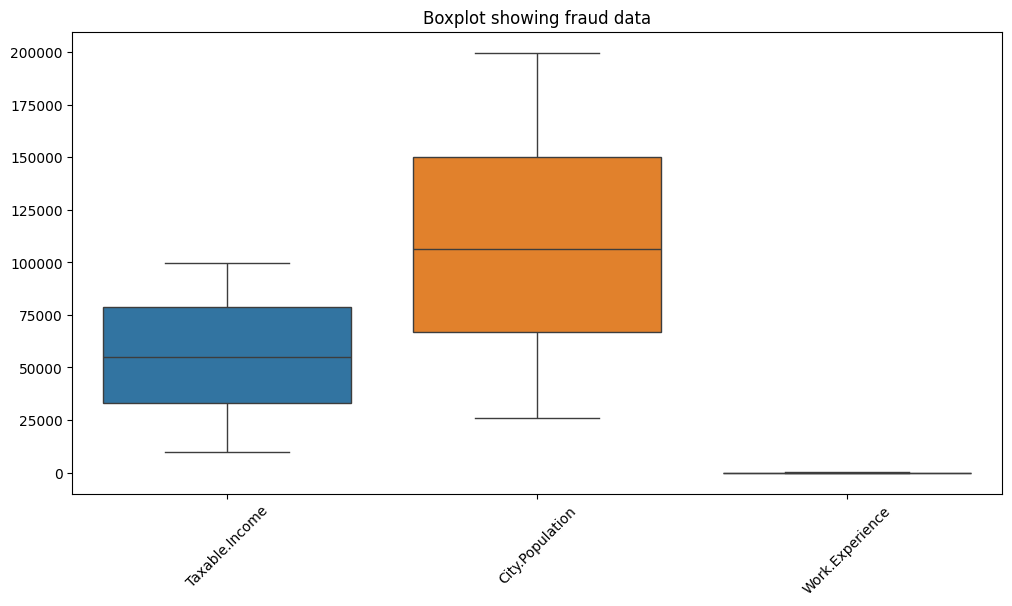

In [144]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=fr_data)
plt.title('Boxplot showing fraud data')
plt.xticks(rotation=45)
plt.show()

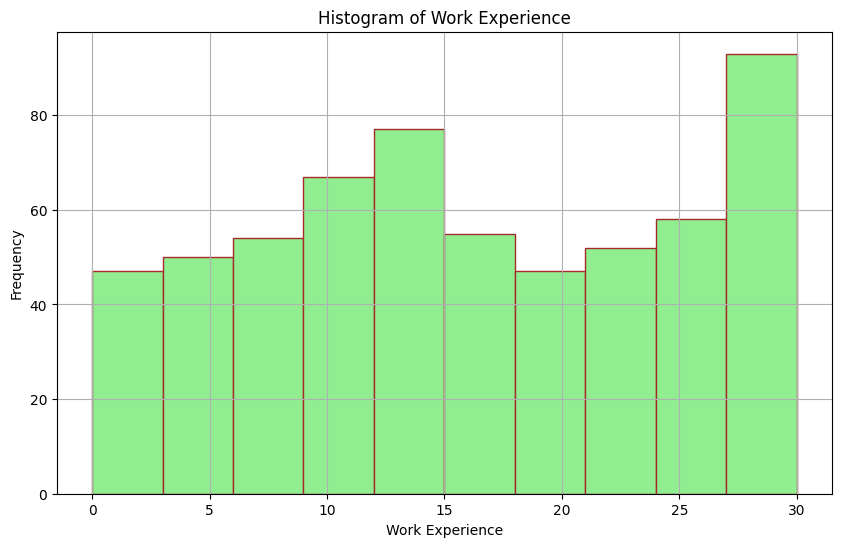

In [146]:
# histogram of work experience
plt.figure(figsize=(10, 6))
plt.hist(fr_data['Work.Experience'], bins=10, color='lightgreen', edgecolor='brown')
plt.title('Histogram of Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

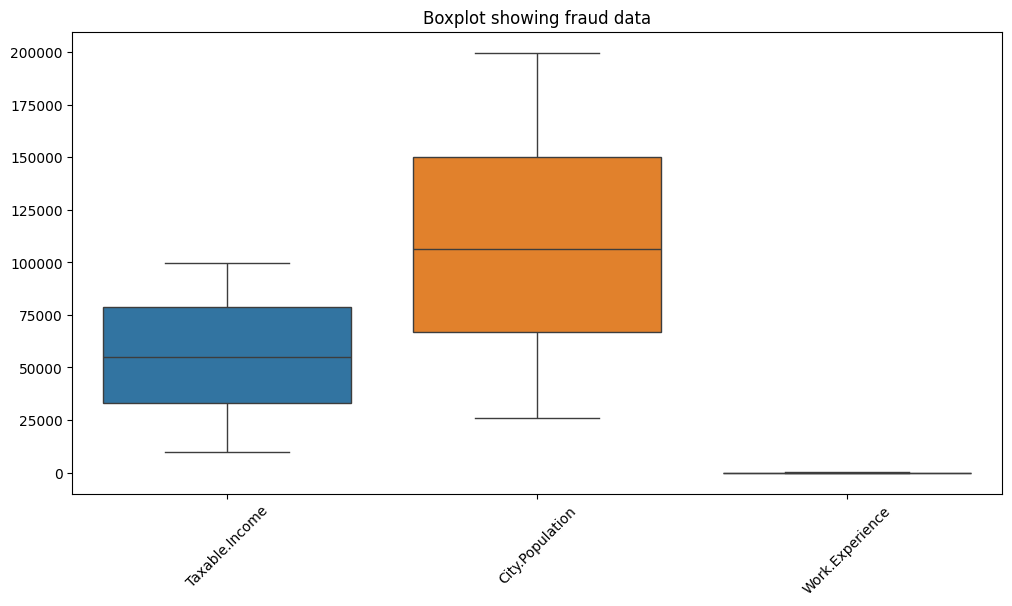

In [147]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=fr_data)
plt.title('Boxplot showing fraud data')
plt.xticks(rotation=45)
plt.show()

In [152]:
fr_data['Undergrad'] = fr_data['Undergrad'].astype('category')
fr_data['Undergrad'] = fr_data['Undergrad'].map({'YES': 1,'NO': 0})

In [153]:
fr_data['Marital.Status'] = fr_data['Marital.Status'].astype('category')
fr_data['Marital.Status'] = fr_data['Marital.Status'].map({'Single': 0,'Divorced': -1, 'Married': 1})

In [154]:
fr_data['Urban'] = fr_data['Urban'].astype('category')
fr_data['Urban'] = fr_data['Urban'].map({'NO': 0, 'YES': 1})

In [155]:
bins = [-np.inf, 30000, np.inf] 
labels = [-1, 1]
fr_data['Taxable.Income']=pd.cut(fr_data['Taxable.Income'], bins=bins,labels=labels)
fr_data['Taxable.Income']=fr_data['Taxable.Income'].astype('int')

In [156]:
fr_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,-1,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,-1,1,39492,7,1
596,1,-1,1,55369,2,1
597,0,-1,1,154058,0,1
598,1,1,1,180083,17,0


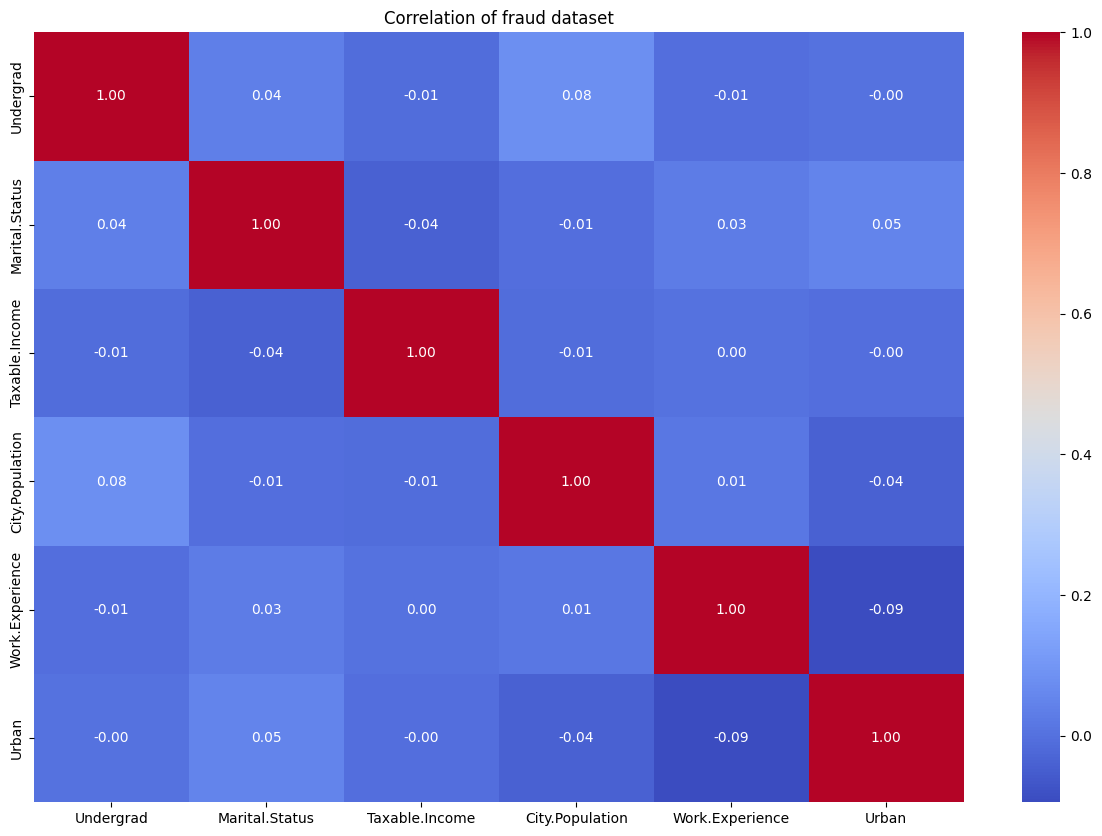

In [159]:
corr_fraud_data = fr_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_fraud_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of fraud dataset')
plt.show()

In [160]:
x=fr_data[['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']]
y=fr_data['Taxable.Income']


In [161]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [162]:
print(x)

[[-1.040833   -0.01043082 -1.17852072 -0.62914254  0.99335541]
 [ 0.96076892 -1.2621297   0.50850002  0.27636996  0.99335541]
 [-1.040833    1.24126805  1.03310911  1.63463872  0.99335541]
 ...
 [-1.040833   -1.2621297   0.90969648 -1.76103318  0.99335541]
 [ 0.96076892  1.24126805  1.43219749  0.1631809  -1.00668904]
 [-1.040833   -1.2621297   0.9915901   0.04999184 -1.00668904]]


In [163]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [164]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.metrics import classification_report, accuracy_score 
import lightgbm as lb 
import xgboost as xgb

In [165]:
# RandomForest
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

print("Random Forest prediction accuracy: ", accuracy_score(y_test,y_pred_rf)) 
print(classification_report(y_test, y_pred_rf))

Random Forest prediction accuracy:  0.7916666666666666
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        21
           1       0.82      0.96      0.88        99

    accuracy                           0.79       120
   macro avg       0.41      0.48      0.44       120
weighted avg       0.68      0.79      0.73       120



In [166]:
# Gradientboosting
gdb_model=GradientBoostingClassifier()
gdb_model.fit(x_train,y_train)
y_pred_gdb=gdb_model.predict(x_test)

print("GradientBoosting prediction accuracy: ", accuracy_score(y_test,y_pred_gdb)) 
print(classification_report(y_test, y_pred_gdb))

GradientBoosting prediction accuracy:  0.7916666666666666
              precision    recall  f1-score   support

          -1       0.17      0.05      0.07        21
           1       0.82      0.95      0.88        99

    accuracy                           0.79       120
   macro avg       0.50      0.50      0.48       120
weighted avg       0.71      0.79      0.74       120



In [167]:
# LightGBM
lb_model = lb.LGBMClassifier()
lb_model.fit(x_train, y_train)
lb_pred = lb_model.predict(x_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lb_pred))
print(classification_report(y_test, lb_pred))

[LightGBM] [Info] Number of positive: 377, number of negative: 103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.785417 -> initscore=1.297516
[LightGBM] [Info] Start training from score 1.297516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

### XGB Classifier

In [175]:
fr_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,-1,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,-1,1,39492,7,1
596,1,-1,1,55369,2,1
597,0,-1,1,154058,0,1
598,1,1,1,180083,17,0


In [176]:
from sklearn.preprocessing import LabelEncoder 
comp_data_xgb['Taxable_income_range']=pd.cut(fr_data['Taxable.Income'], bins=5,labels=False)

In [177]:
x

array([[-1.040833  , -0.01043082, -1.17852072, -0.62914254,  0.99335541],
       [ 0.96076892, -1.2621297 ,  0.50850002,  0.27636996,  0.99335541],
       [-1.040833  ,  1.24126805,  1.03310911,  1.63463872,  0.99335541],
       ...,
       [-1.040833  , -1.2621297 ,  0.90969648, -1.76103318,  0.99335541],
       [ 0.96076892,  1.24126805,  1.43219749,  0.1631809 , -1.00668904],
       [-1.040833  , -1.2621297 ,  0.9915901 ,  0.04999184, -1.00668904]])

In [178]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int32

In [179]:
label_encoder = LabelEncoder()
y2 = label_encoder.fit_transform(y)

In [180]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.2,random_state=21)

In [181]:


# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.775
              precision    recall  f1-score   support

           0       0.25      0.14      0.18        21
           1       0.83      0.91      0.87        99

    accuracy                           0.78       120
   macro avg       0.54      0.53      0.53       120
weighted avg       0.73      0.78      0.75       120

